## Importing dependenices and reading Data 

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

from datetime import datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures,RobustScaler
from sklearn.model_selection import train_test_split

from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
data = pd.read_csv(r"C:\Users\s_sad\Downloads\marketing_campaign.csv", sep='\t')
df = pd.DataFrame(data)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
#changing to lower case

df.columns  =df.columns.str.lower()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

### Feature Engineering 

There are only categorical variables namely education and marital status. we will start by cleaning them.

In [8]:
df.marital_status.value_counts() # we will try to summarize them.

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

In [9]:
def clean_marital_status_col(x):
    if x in ["Single", "Divorced","Widow", "Alone", "Absurd", "YOLO"]:
        return "Single"
    elif x in ['Married', 'Together']:
        return "Together"
df["marital_status"] = df["marital_status"].apply(clean_marital_status_col)
df["marital_status"] = df["marital_status"].apply(lambda x: clean_marital_status_col(x))
df.marital_status.value_counts()

Together    1444
Single       796
Name: marital_status, dtype: int64

In [10]:
df.education.value_counts() # it also shows too many unnecessary categories. we will try to summarize them.

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

In [11]:
def clean_education_col(x):
    if x in ["Basic", "2n Cycle"]:
        return "Undergraduate"
    elif x in ["Graduation","Master"]:
        return "Graduate"
    else:
        return x
df['education'] = df['education'].apply(lambda x: clean_education_col(x))
df.education.value_counts()

Graduate         1497
PhD               486
Undergraduate     257
Name: education, dtype: int64

In order to get some useful insights from data, we can create few more useful columns

In [12]:
# 1. creating new column with name "spending"
df['spending'] = df['mntwines']+df['mntfruits']+df['mntmeatproducts']+ df['mntfishproducts']+df['mntsweetproducts']+df['mntgoldprods']

# 2. total number of children at home
df['children'] = df['kidhome'] + df['teenhome']


#3. total number of campaigns accepted by each customer
df['total_accepted_camp'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5']

# 4. Column year of birth of customer is not useful, we will try to extract age of customer from this column

df['dt_customer'] = pd.to_datetime(df['dt_customer']) # converting datatype of to datetime
df['dt_customer'].max() # latest registration date of a customer is 2014
df['age'] = 2014-df['year_birth']#.astype(int)
print("The youngest customer:", df.age.min())
print("The oldest customer:", df.age.max())


The youngest customer: 18
The oldest customer: 121


In [13]:
# renaming columns: 
df=df.rename(columns={'numwebpurchases': "web_purchases",
                              'numstorepurchases':'store_purchase',
                              'mntwines': 'wine','mntfruits': 'fruits', 'mntmeatproducts': 'meat', 
                              'mntfishproducts': 'fish', 'mntsweetproducts': 'sweets','mntgoldprods': 'gold',
                              'numdealspurchases': 'discount_purchases', 'numcatalogpurchases': 'catalog_purchases', 
                             'numwebvisitsmonth': 'web_visits_monthly'})
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'wine', 'fruits', 'meat', 'fish',
       'sweets', 'gold', 'discount_purchases', 'web_purchases',
       'catalog_purchases', 'store_purchase', 'web_visits_monthly',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'spending', 'children', 'total_accepted_camp', 'age'],
      dtype='object')

After cleaning columns, we can now decide to delete few columns that don't look very important for analysis.

In [14]:
# deleting unnecessary columns
df.drop(columns =['year_birth','id', 'dt_customer','acceptedcmp3','acceptedcmp4','acceptedcmp5','acceptedcmp1','acceptedcmp2', 'z_costcontact','z_revenue'], axis = 1, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            2240 non-null   object 
 1   marital_status       2240 non-null   object 
 2   income               2216 non-null   float64
 3   kidhome              2240 non-null   int64  
 4   teenhome             2240 non-null   int64  
 5   recency              2240 non-null   int64  
 6   wine                 2240 non-null   int64  
 7   fruits               2240 non-null   int64  
 8   meat                 2240 non-null   int64  
 9   fish                 2240 non-null   int64  
 10  sweets               2240 non-null   int64  
 11  gold                 2240 non-null   int64  
 12  discount_purchases   2240 non-null   int64  
 13  web_purchases        2240 non-null   int64  
 14  catalog_purchases    2240 non-null   int64  
 15  store_purchase       2240 non-null   i

In [16]:
# data is relatively clean. For the income column we will try to replace nan with mean value.
df['income'].fillna((df['income'].mean()), inplace=True)
df.isna().sum()

education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
recency                0
wine                   0
fruits                 0
meat                   0
fish                   0
sweets                 0
gold                   0
discount_purchases     0
web_purchases          0
catalog_purchases      0
store_purchase         0
web_visits_monthly     0
complain               0
response               0
spending               0
children               0
total_accepted_camp    0
age                    0
dtype: int64

### Separating Categorical and numerical Variables 

In [17]:
numerical_df = df.select_dtypes(include = np.number)
numerical_df

,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,1617,0,0,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,27,2,0,60
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,776,0,0,49
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,53,1,0,30
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,422,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,1341,1,0,47
2236,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,444,3,1,68
2237,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,1241,0,1,33
2238,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,843,1,0,58


In [18]:
categorical_df = df.select_dtypes(include = np.object)
categorical_df

,education,marital_status
0,Graduate,Single
1,Graduate,Single
2,Graduate,Together
3,Graduate,Together
4,PhD,Together
...,...,...
2235,Graduate,Together
2236,PhD,Together
2237,Graduate,Single
2238,Graduate,Together


In [19]:
numerical_df.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'wine', 'fruits', 'meat',
       'fish', 'sweets', 'gold', 'discount_purchases', 'web_purchases',
       'catalog_purchases', 'store_purchase', 'web_visits_monthly', 'complain',
       'response', 'spending', 'children', 'total_accepted_camp', 'age'],
      dtype='object')

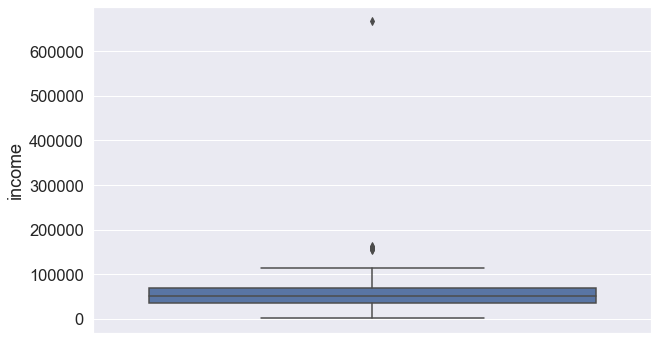

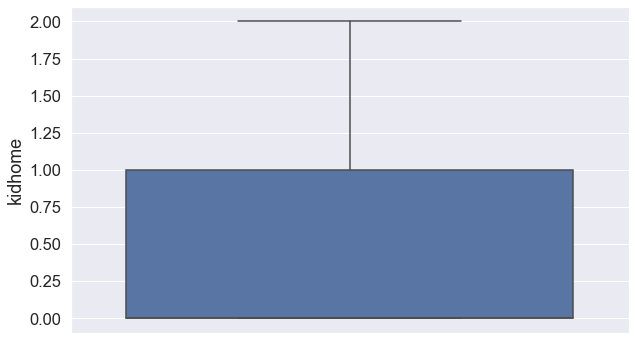

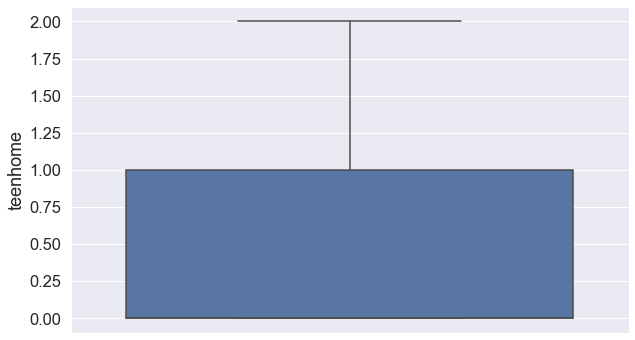

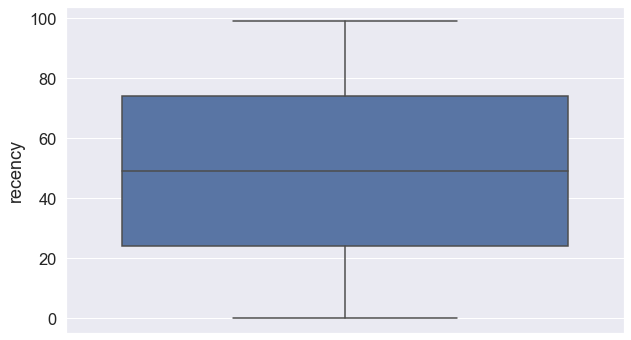

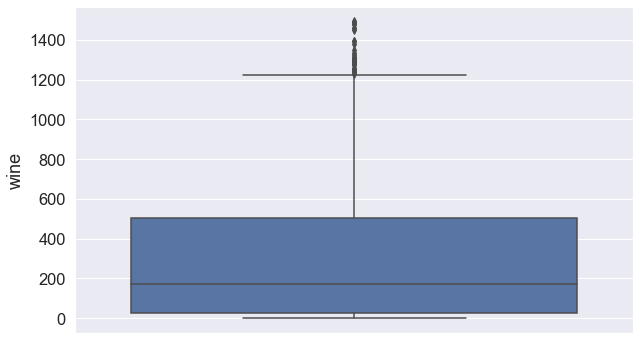

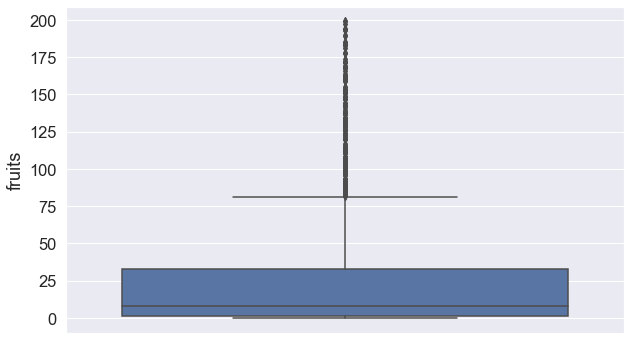

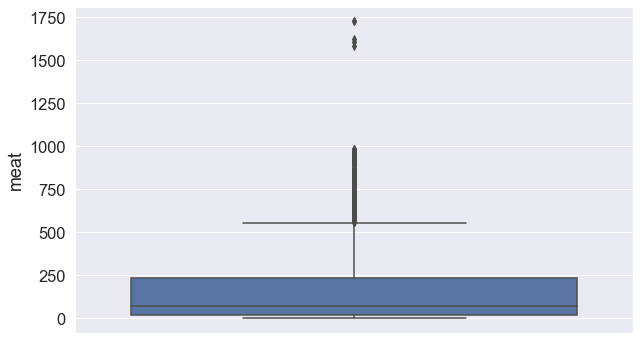

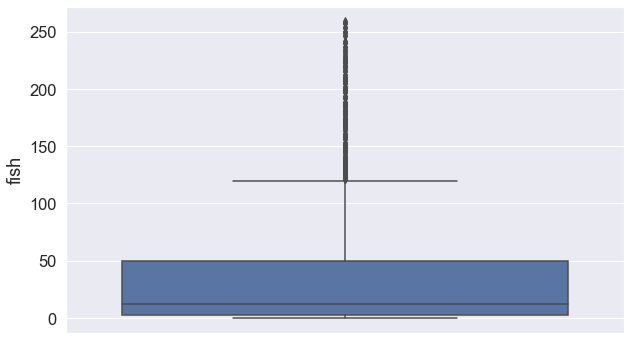

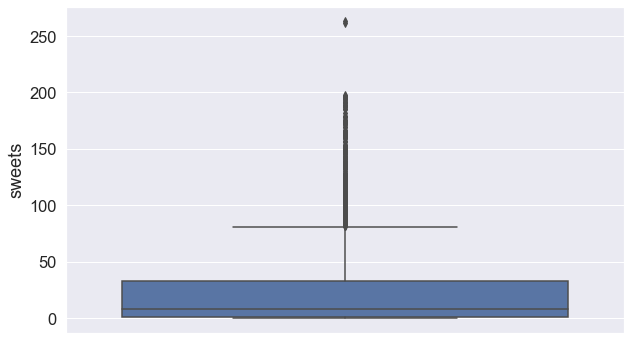

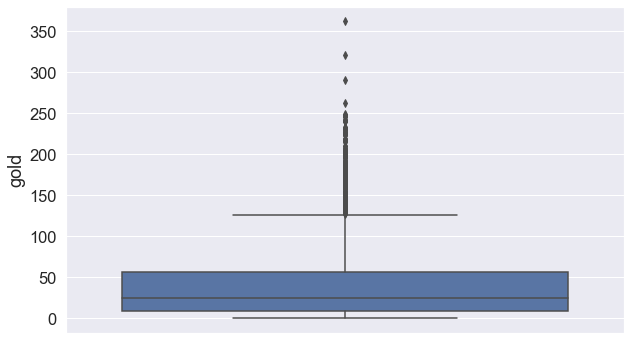

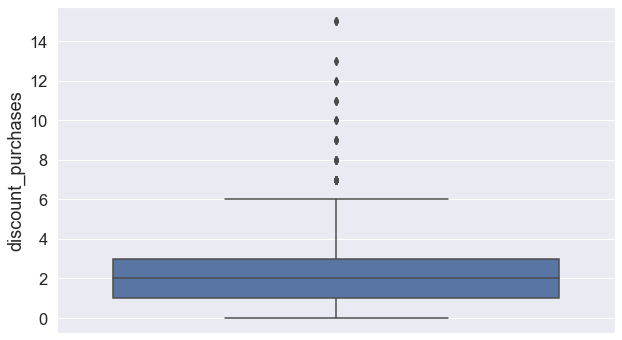

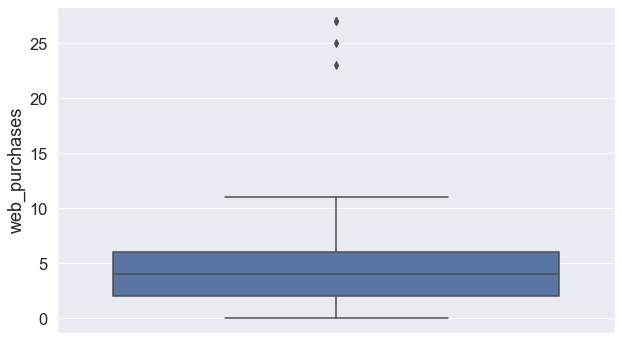

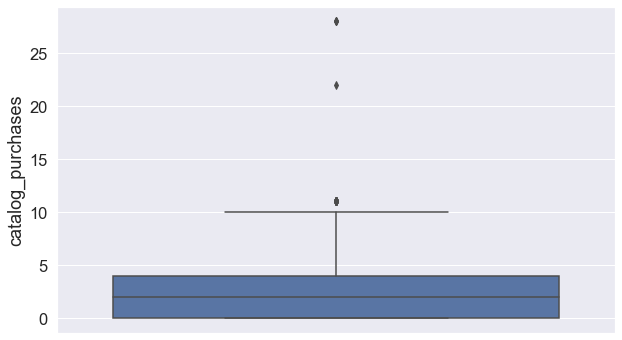

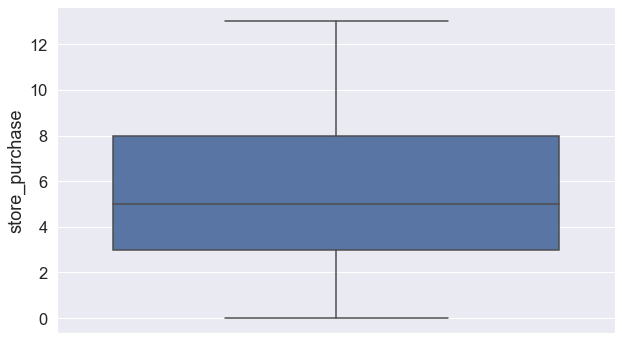

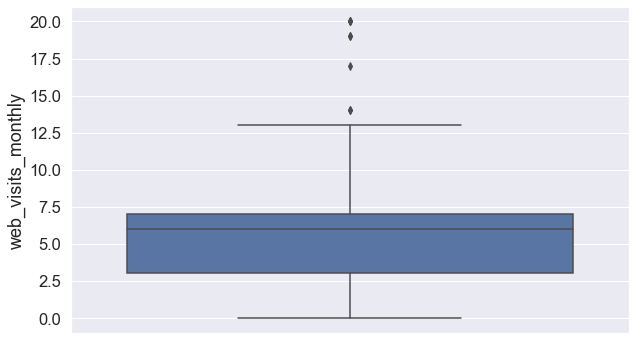

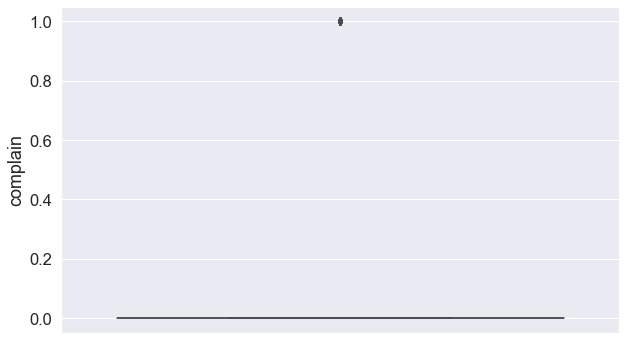

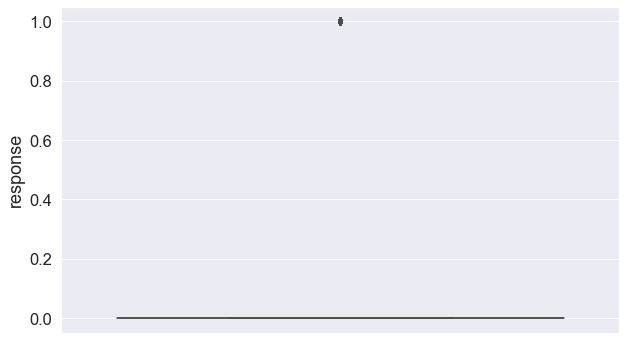

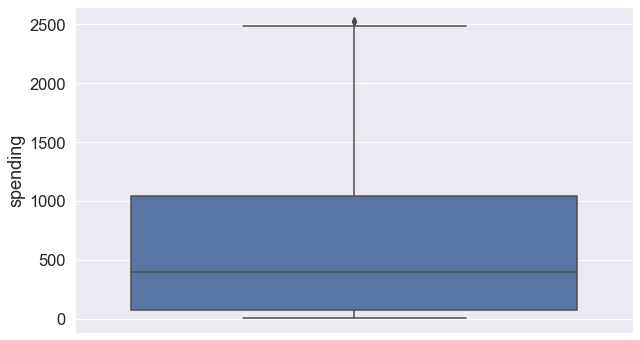

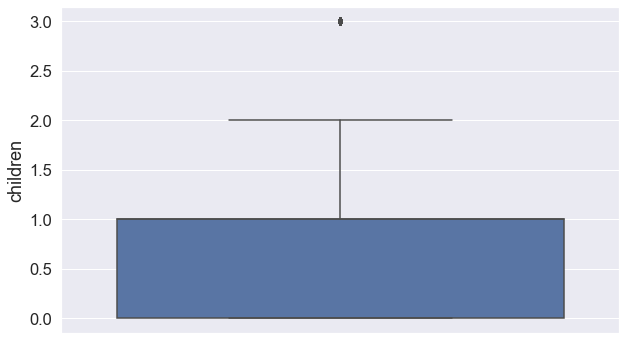

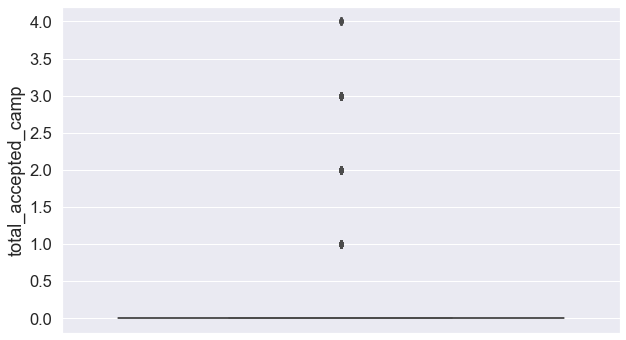

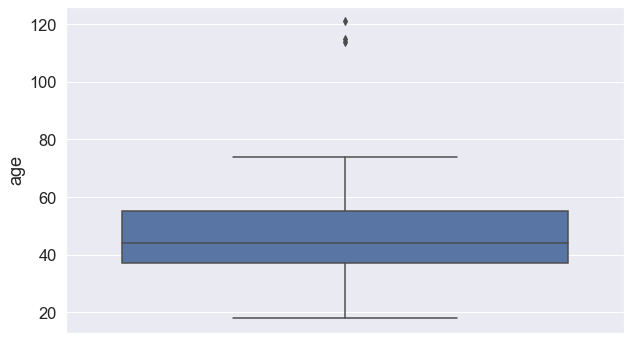

In [51]:
# Checking Outliers
sns.set(style = 'darkgrid', rc = {'figure.figsize':(10,6)}, font_scale = 1.5)
for col in numerical_df.columns:
    sns.boxplot(y = numerical_df[col])
    plt.show()

Box plots shows that there are too many outliers in many variables. Therefore removing all of them will reduce our dataset to large extent,therefore we will first try to get results without removing outliers. 

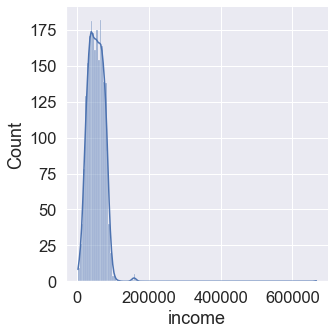

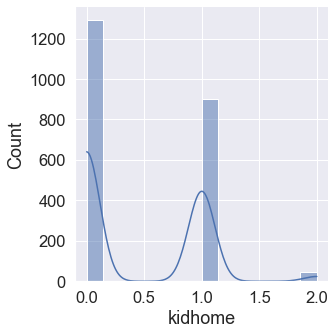

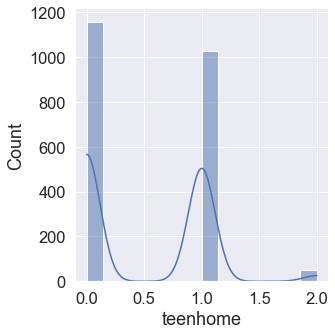

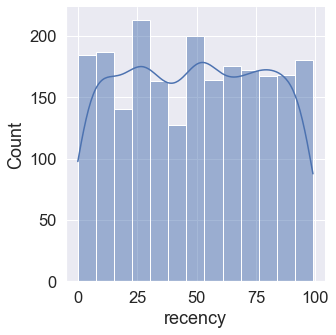

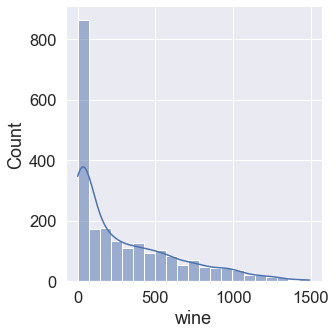

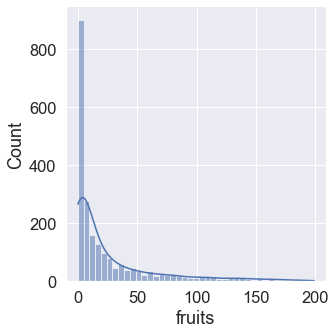

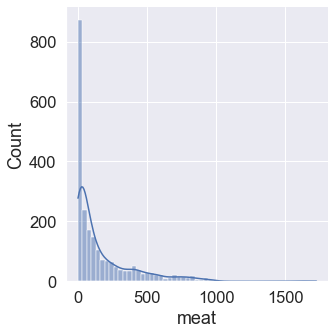

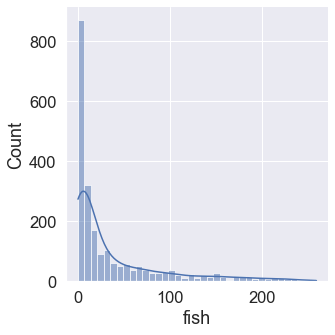

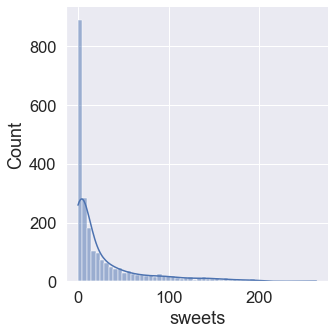

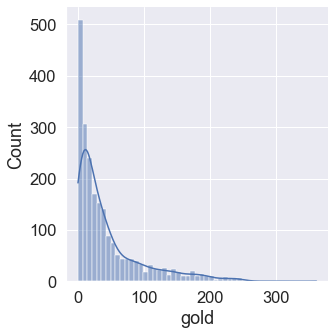

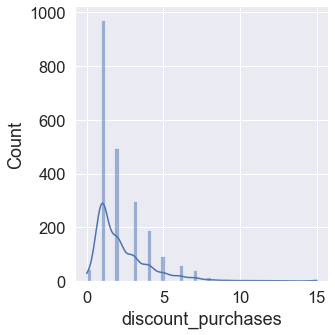

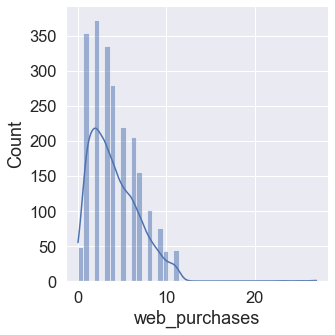

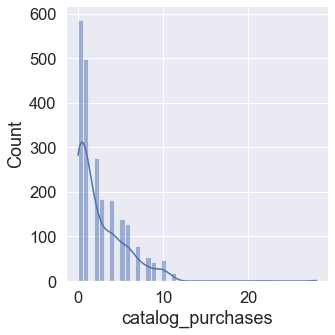

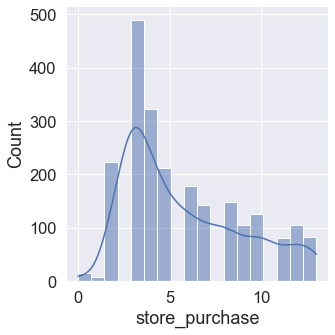

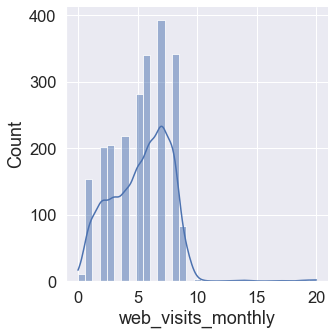

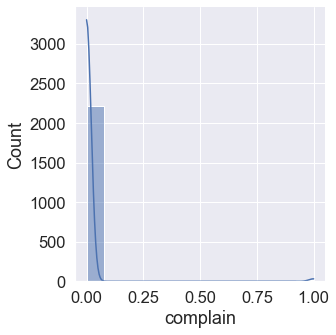

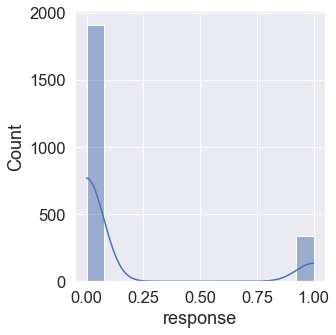

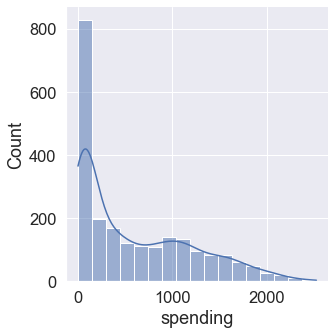

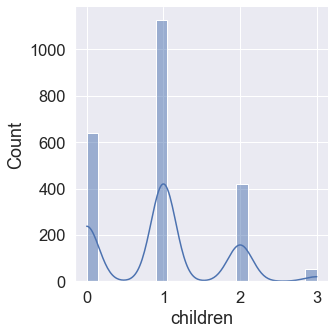

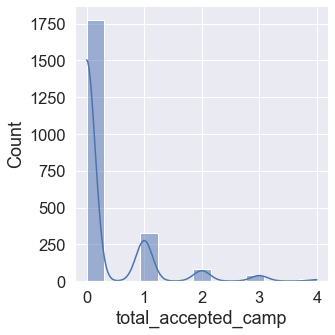

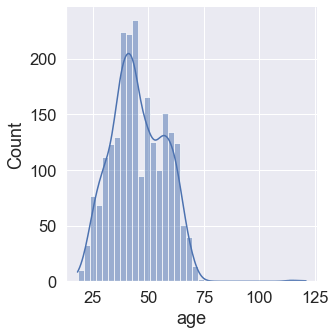

In [52]:
# Checking distribution of variables
sns.set(style = 'darkgrid', rc = {'figure.figsize':(10,6)}, font_scale = 1.5)
for col in numerical_df.columns:
    sns.displot(x = numerical_df[col], kde = True)
    plt.show()

## Bivariate Anaylsis 

In [24]:
df.describe()

,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,0.149107,605.798214,0.950446,0.297768,45.194196
std,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.356274,602.249288,0.751803,0.678381,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,18.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,68.750000,0.000000,0.000000,37.000000
50%,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,396.000000,1.000000,0.000000,44.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,1045.500000,1.000000,0.000000,55.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,2525.000000,3.000000,4.000000,121.000000


In [25]:
df_corr = df.corr()
df_corr

,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
income,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,-0.027223,0.132756,0.664706,-0.290712,0.307098,0.160942
kidhome,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.040207,-0.080008,-0.556669,0.689971,-0.211892,-0.230176
teenhome,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,0.003138,-0.154446,-0.138384,0.698433,-0.127759,0.352111
recency,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,0.013231,-0.198437,0.020433,0.018053,-0.012570,0.019871
wine,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,-0.039007,0.247254,0.891839,-0.351909,0.512358,0.157773
fruits,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,-0.005166,0.125289,0.614229,-0.394853,0.161002,0.017917
meat,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,-0.023483,0.236335,0.842965,-0.502208,0.309313,0.030872
fish,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,-0.020953,0.111331,0.642818,-0.425503,0.177830,0.041625
sweets,0.436162,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294,-0.022485,0.117372,0.603016,-0.383137,0.200237,0.018133
gold,0.321978,-0.349595,-0.021725,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.049085,0.421836,0.437697,0.381678,-0.250719,-0.030861,0.139850,0.524262,-0.266095,0.193741,0.061818


In [26]:
df_corr['response'].sort_values(ascending = False)

response               1.000000
total_accepted_camp    0.426035
spending               0.265298
wine                   0.247254
meat                   0.236335
catalog_purchases      0.220810
web_purchases          0.148730
gold                   0.139850
income                 0.132756
fruits                 0.125289
sweets                 0.117372
fish                   0.111331
store_purchase         0.039363
discount_purchases     0.002238
complain              -0.001707
web_visits_monthly    -0.003987
age                   -0.021325
kidhome               -0.080008
teenhome              -0.154446
children              -0.169163
recency               -0.198437
Name: response, dtype: float64

In [27]:
# None of the two variables have corelation higher than 0.9. Multicollinearity does not exist in data. 
correlation = df.corr() # pearson correlation
mask = correlation > 0.9
correlation[mask]

,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
income,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kidhome,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teenhome,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recency,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wine,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fruits,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meat,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


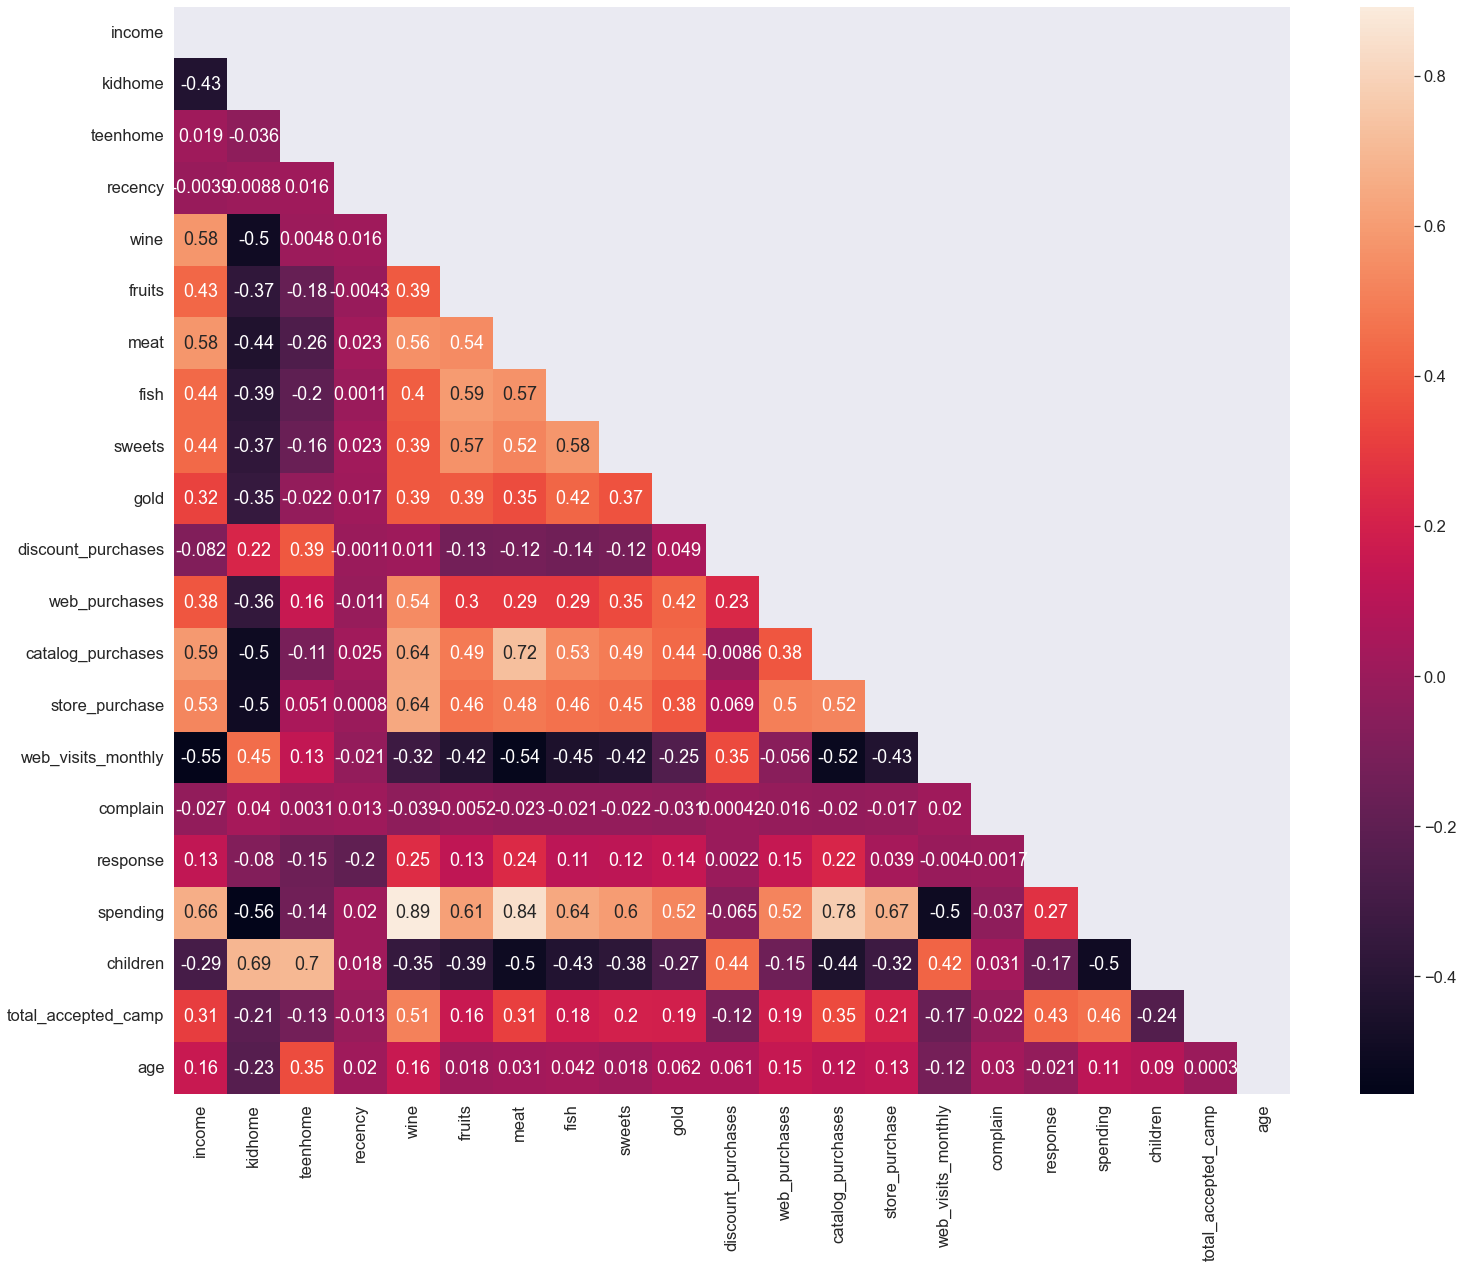

In [28]:
#heatmap
mask = np.zeros_like(correlation)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(correlation, mask=mask, cbar = True, annot=True)
plt.show()

### Ordinal Encoder to Categorical Variables 

As we need to convert all the variables to numerical before applying any model, so we have used ordinal encoder in order to change categorical variabels to numerical

In [29]:
# applying ordinal encoder to categorical variables.
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["education","marital_status"]])
df[["education","marital_status"]] = enc.transform(df[["education", "marital_status"]])
df

,education,marital_status,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
0,0.0,0.0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,1617,0,0,57
1,0.0,0.0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,27,2,0,60
2,0.0,1.0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,776,0,0,49
3,0.0,1.0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,53,1,0,30
4,1.0,1.0,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,422,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,1.0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,1341,1,0,47
2236,1.0,1.0,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,444,3,1,68
2237,0.0,0.0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,1241,0,1,33
2238,0.0,1.0,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,843,1,0,58


In [31]:
df.response.value_counts()

0    1906
1     334
Name: response, dtype: int64

### Feature Selection from Baseline Model using GridSearchCV 

Our focus is to maximize recall score, as we want to target only those users who will accept campaigns. 

In [32]:
data = df.copy()
X = data.drop(["response"], axis = 1)
X= pd.get_dummies(X)
y = data["response"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

sx = StandardScaler()
sx.fit_transform(X_train)
sx.transform(X_test)

param = {'C':[10**-2,10**-1,10**0,10**1,10**2]}
lr_model = LogisticRegression(penalty = 'l1', solver = 'liblinear')
gs_model = GridSearchCV(estimator = lr_model,param_grid = param)
gs_model.fit(X_train,y_train)
model = LogisticRegression(**gs_model.best_params_,penalty = 'l1', solver = 'liblinear')
model.fit(X_train,y_train)
coef = model.coef_[0]
imp_features = pd.Series(X_train.columns)[list(coef!=0)]
print("Redundant Features Count:",sum(model.coef_[0]==0))
print("redundant features names:", list(pd.Series(X_train.columns[list(coef==0)])))
print("important features names:", list(pd.Series(X_train.columns[list(coef > 0)])))
gs_model.best_params_


Redundant Features Count: 1
redundant features names: ['children']
important features names: ['education', 'kidhome', 'fruits', 'meat', 'gold', 'discount_purchases', 'web_purchases', 'catalog_purchases', 'web_visits_monthly', 'complain', 'spending', 'total_accepted_camp', 'age']


{'C': 10}

In [33]:
feature_importance = pd.DataFrame({"Features": X_train.columns,
                                  "Value": coef})
sorted_data = feature_importance.sort_values(["Value"],ascending = False)
feature_importance["Value_abs"] = feature_importance["Value"].abs()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'total_accepted_camp'),
  Text(1, 0, 'marital_status'),
  Text(2, 0, 'teenhome'),
  Text(3, 0, 'web_visits_monthly'),
  Text(4, 0, 'kidhome'),
  Text(5, 0, 'store_purchase'),
  Text(6, 0, 'education'),
  Text(7, 0, 'web_purchases'),
  Text(8, 0, 'discount_purchases'),
  Text(9, 0, 'complain'),
  Text(10, 0, 'catalog_purchases'),
  Text(11, 0, 'recency'),
  Text(12, 0, 'age'),
  Text(13, 0, 'gold'),
  Text(14, 0, 'meat'),
  Text(15, 0, 'fruits'),
  Text(16, 0, 'fish'),
  Text(17, 0, 'spending'),
  Text(18, 0, 'sweets'),
  Text(19, 0, 'wine'),
  Text(20, 0, 'income'),
  Text(21, 0, 'children')])

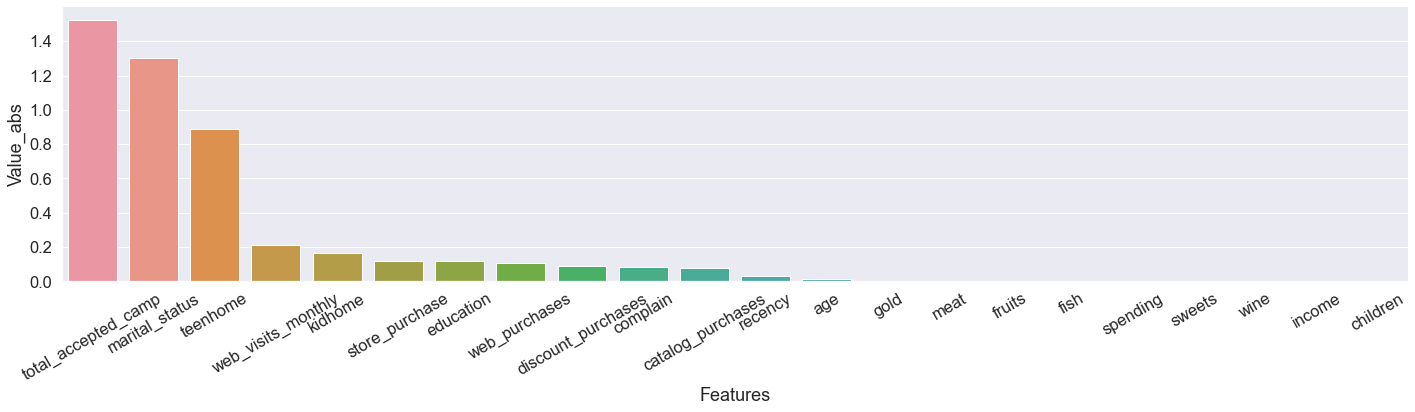

In [34]:
sns.catplot(x = "Features",
            y = "Value_abs",
            data = feature_importance.sort_values(by = "Value_abs", ascending = False),
            kind ="bar", aspect= 20/5)
plt.xticks(rotation=30)

Hyper-parameter tunning shows that there is only one  redundant feature in the model but we will not remove them because we think that feature is important and the best value of C = 10. So we will next try to look at the model with and wihtout these hyperparameters. 

In [35]:
data1 = df.copy()
X = data1.drop(["response"], axis = 1)
X= pd.get_dummies(X)
y = data1["response"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [36]:
def model_inplace(scaler,model,X_train,X_test,y_train,y_test):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(model)
    print("score on train set:", model.score(X_train,y_train))
    print("score on test set:", model.score(X_test,y_test))
    print("f1 score on train set:", f1_score(y_train,pred_train))
    print("F1 score on trest set:", f1_score(y_test,pred_test))
    print('Recall train: %.3f' % recall_score(y_train, pred_train))
    print('Recall test: %.3f' % recall_score(y_test, pred_test))
    print(ConfusionMatrixDisplay.from_estimator(model, X_test, y_test))
    print(RocCurveDisplay.from_estimator(model, X_test, y_test))

In [37]:
from sklearn.tree import DecisionTreeClassifier
lr = LogisticRegression()
lr_hyper_parameter = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear', class_weight='balanced')
scaler1 = StandardScaler()

In [38]:
sm = SMOTE(k_neighbors = 2)  
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

LogisticRegression()
score on train set: 0.8013654096228868
score on test set: 0.8102678571428571
f1 score on train set: 0.8019448946515397
F1 score on trest set: 0.5812807881773399
Recall train: 0.804
Recall test: 0.738


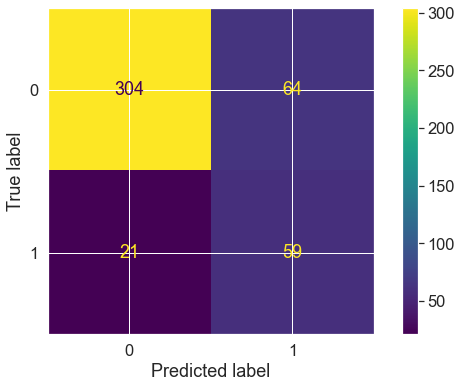

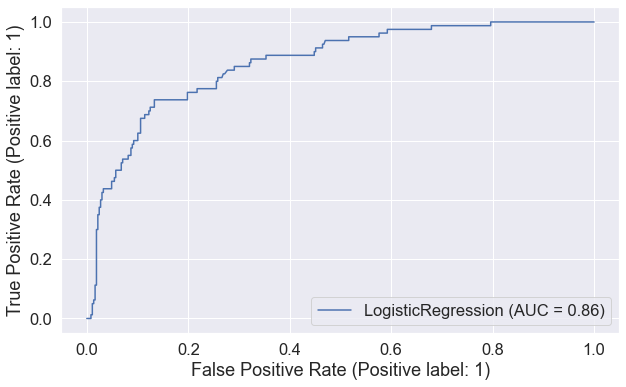

In [39]:
model_inplace(scaler1,lr, X_train_SMOTE,X_test,y_train_SMOTE,y_test)


Simple logistic model is providing good accuracy score but Recall score is more good for train data as compared to test data.

LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                   solver='liblinear')
score on train set: 0.8091517857142857
score on test set: 0.8236607142857143
f1 score on train set: 0.5403225806451613
F1 score on trest set: 0.6146341463414633
Recall train: 0.791
Recall test: 0.787


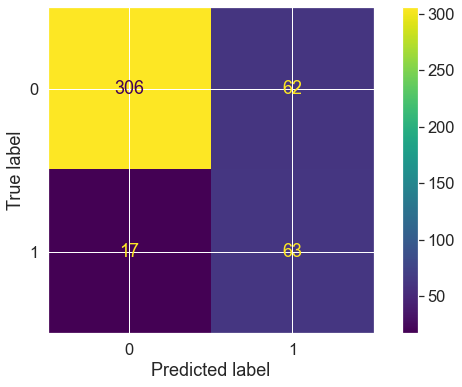

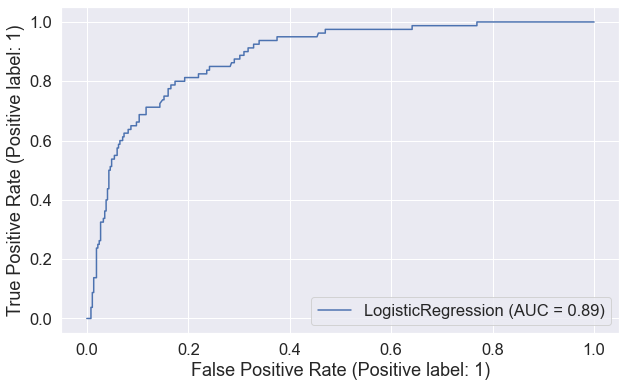

In [40]:
model_inplace(scaler1,lr_hyper_parameter,X_train,X_test,y_train,y_test)

Using Logistic Regression with Hyper parameters has improved the model a lot. Recall score improved a lot. AUC curve is showing good score, so model is very good in separating two classes. We will try now to check confidence interval for this model. 

### Confidence Interval for Test Data

In [41]:
# Confidence Interval for Class 1 using Hyper_parameter_logistic_regression
from scipy import stats
import math as m
def confidence_interval_proportion(confidence_level):
    n = 63 # predicted True value for 1
    p = 63/80
    t = stats.t.ppf(confidence_level+(1- confidence_level)/2, df=n-1)
    error = t * m.sqrt(p*(1-p)/n)
    confidence_interval = [p -error, p+ error]
    return confidence_interval
CI = confidence_interval_proportion(0.90)
CI

[0.7014402633094425, 0.8735597366905574]

Confidence interval shows that proportion of recall (i.e. proporions of actual positive identified correctly) for population lies between 0.70 to 0.87. Confidence interval is narrow. It suggests that model has good predictive power. We will try to check few more models, to find out if we can find more better results than this.

## Decision Tree, Random Forest and KNN¶

As target variable is very imbalance, therefore we will use SMOTE on all models.

In [42]:
sm = SMOTE(k_neighbors = 15)  # maximum accuracy is approachable at 15 
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [43]:
X = df.drop(["response"], axis = 1)
X= pd.get_dummies(X)
y = df["response"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [44]:
def model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("score on train set:", model.score(X_train,y_train))
    print("score on test set:", model.score(X_test,y_test))
    print("f1 score on train set:", f1_score(y_train,pred_train))
    print("F1 score on trest set:", f1_score(y_test,pred_test))
    print('Recall train: %.3f' % recall_score(y_train, pred_train))
    print('Recall test: %.3f' % recall_score(y_test, pred_test))

In [45]:
#Hyper parameter tunning on Random Forest
params = {'bootstrap': [True],'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10], 'n_estimators': [20,30,50,100,200,300]}
grid = GridSearchCV(estimator = RandomForestClassifier(),  param_grid= params, cv=5, scoring = 'accuracy')

grid.fit(X_train, y_train)
grid.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'n_estimators': 30}

In [53]:
decision_tree = DecisionTreeClassifier(random_state = 42)
random_forest = RandomForestClassifier(n_estimators=30, max_depth=9, criterion='gini' ,random_state = 0, bootstrap = True)
KNN = KNeighborsClassifier(n_neighbors=3)

In [54]:
sm = SMOTE(k_neighbors = 2)  # maximum accuracy is approachable at 15 
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [55]:
model(random_forest,X_train_SMOTE,X_test,y_train_SMOTE,y_test)

score on train set: 0.9785435630689207
score on test set: 0.8683035714285714
f1 score on train set: 0.9786130913804278
F1 score on trest set: 0.6242038216560509
Recall train: 0.982
Recall test: 0.613


In [56]:
model(decision_tree,X_train_SMOTE,X_test,y_train_SMOTE,y_test)

score on train set: 0.9964239271781534
score on test set: 0.8169642857142857
f1 score on train set: 0.996411092985318
F1 score on trest set: 0.5060240963855422
Recall train: 0.993
Recall test: 0.525


In [57]:
model(KNN,X_train_SMOTE,X_test,y_train_SMOTE,y_test)

score on train set: 0.9245773732119635
score on test set: 0.6964285714285714
f1 score on train set: 0.9280843149411035
F1 score on trest set: 0.38181818181818183
Recall train: 0.973
Recall test: 0.525


All the models KNN, Random forest with and without hyper parameter tunning, decision tree are overfitting. Best model so far has been logistic regression applied with hyper parameters.